# HW 2 for MLF
**Name: 邢芳榕**

**Student ID：2201212427**

In [3]:
import pandas as pd
import numpy as np

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

In [5]:
df = pd.read_csv(".\GiveMeSomeCredit\cs-training.csv")
df.shape

(150000, 12)

In [6]:
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [7]:
df.fillna(df.mean(), inplace=True)

In [8]:
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [9]:
from collections import Counter
Counter(df.iloc[:,1])

Counter({1: 10026, 0: 139974})

In [10]:
X, y = df.iloc[:,2:].values, df.iloc[:,1].values
print(X.shape, y.shape)

(150000, 10) (150000,)


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [12]:
X_train_std, X_test_std

(array([[-0.02612498, -1.84576942, -0.10034927, ..., -0.89452755,
         -0.05763283, -0.69005928],
        [-0.02457942,  0.39032769, -0.10034927, ..., -0.01620505,
         -0.05763283,  1.12671789],
        [-0.02283123, -1.37144579, -0.10034927, ...,  0.86211745,
         -0.05763283,  0.2183293 ],
        ...,
        [-0.02551586, -0.28727749, -0.10034927, ..., -0.89452755,
         -0.05763283,  1.12671789],
        [-0.02675039, -0.35503801, -0.10034927, ..., -0.89452755,
         -0.05763283, -0.69005928],
        [-0.02412211, -0.76160112,  0.13880533, ..., -0.01620505,
         -0.05763283,  2.94349507]]),
 array([[-0.02590971, -1.84576942, -0.10034927, ..., -0.89452755,
          0.18368541, -0.69005928],
        [-0.02480655,  0.39032769, -0.10034927, ..., -0.89452755,
         -0.05763283,  1.12671789],
        [-0.02723062,  0.7968908 , -0.10034927, ...,  0.86211745,
         -0.05763283, -0.69005928],
        ...,
        [-0.02727342, -0.21951698, -0.10034927, ..., -

In [13]:
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(penalty='l1', C=0.001, solver='liblinear', multi_class='ovr', class_weight='balanced')
lr.fit(X_train_std, y_train)

# print('Training accuracy:', lr.score(X_train_std, y_train))
# print('Test accuracy:', lr.score(X_test_std, y_test))
# print('lr.coef:', lr.coef_)
probas = lr.predict_proba(X_test_std)
fpr, tpr, thresholds = roc_curve(y_test,
                                 probas[:, 1],
                                 pos_label=1)
roc_auc = auc(fpr, tpr)
roc_auc

0.7637857312425314

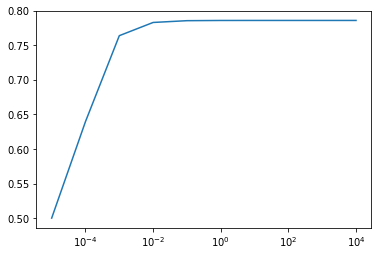

In [14]:
import matplotlib.pyplot as plt


def LR(C):
    lr = LogisticRegression(penalty='l1', C=C, solver='liblinear', multi_class='ovr', class_weight='balanced')
    lr.fit(X_train_std, y_train)
    probas = lr.predict_proba(X_test_std)
    fpr, tpr, thresholds = roc_curve(y_test,
                                     probas[:, 1],
                                     pos_label=1)
    roc_auc = auc(fpr, tpr)
    return roc_auc, lr.coef_

fig, ax = plt.subplots()
C = [10**i for i in range(-5, 5)]
results = [LR(c)[0] for c in C]
ax.semilogx(C, results)

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.29948722, 0.15331043, 0.12271467, 0.10121709, 0.09972932,
       0.093433  , 0.07332104, 0.054384  , 0.00171959, 0.00068364])

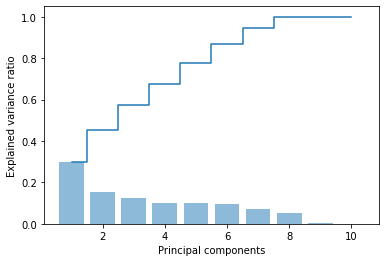

In [16]:
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [17]:
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [18]:
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=8),
                        LogisticRegression(random_state=1, solver='lbfgs', class_weight='balanced'))

pipe_lr.fit(X_train, y_train)
probas = pipe_lr.predict_proba(X_test_std)
fpr, tpr, thresholds = roc_curve(y_test,
                                 probas[:, 1],
                                 pos_label=1)
roc_auc = auc(fpr, tpr)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f, AUC: %.3f' % (pipe_lr.score(X_test, y_test),roc_auc))

Test Accuracy: 0.768, AUC: 0.763


In [19]:
from sklearn import metrics
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [20]:
pipe_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'pca', 'logisticregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [22]:
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         PCA(n_components=8),
                         SVC(random_state=1, max_iter=10000, class_weight='balanced'))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='roc_auc', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)  # use all available CPUs for calculation
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

KeyboardInterrupt: 

*The cell above needs too long time to run, so I interrupted it.*

In [23]:
from sklearn.model_selection import GridSearchCV

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=8),
                        LogisticRegression(random_state=1, solver='lbfgs', class_weight='balanced'))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'logisticregression__penalty': ['l1', 'l2'], 
               'logisticregression__C': param_range, 
               'pca__n_components':range(1,11)}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='roc_auc', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)  # use all available CPUs for calculation
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

D:\py\anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.76286933 0.74311448
 0.68776008 0.68981779 0.6903085  0.69217396 0.69730827 0.69720917
 0.69938191 0.70189127        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.76286933 0.79955036 0.76266025 0.76243304 0.7613606  0.76539924
 0.76470212 0.76466839 0.76477609 0.76589124        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.76286933 0.80939043 0.79102307 0.79039193
 0.78962685 0.79378598 0.79270157 0.79274788 0.79060962 0.78812794
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.76286933 0.81044142
 0.79509644 0.79439266 0.79374663 0.79795411 0.79691087 0.79697

0.8105589542226765
{'logisticregression__C': 1000.0, 'logisticregression__penalty': 'l2', 'pca__n_components': 2}


We used the PCA method and choosed 8 components to train the LR as shown previously, but from the grid research it turns out that using PCA with only 2 components performs the best, with a score of 0.81.